## default grph

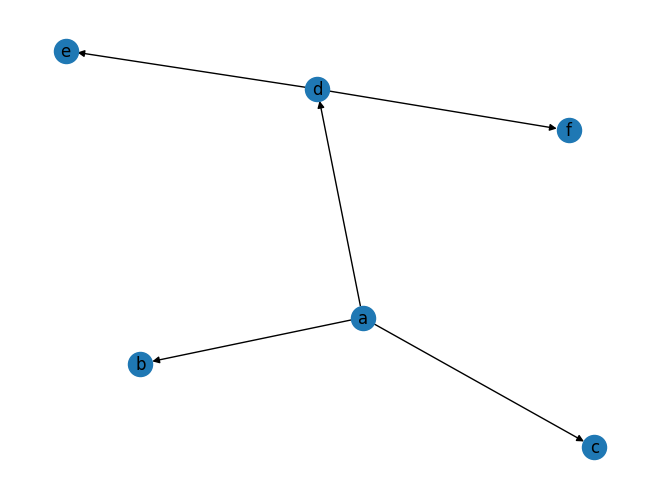

In [1]:
import networkx as nx

edges = [
  ('a', 'b'),
  ('a', 'c'),
  ('a', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]

G = nx.DiGraph(edges)
nx.draw(G, with_labels=True)

## tree layout

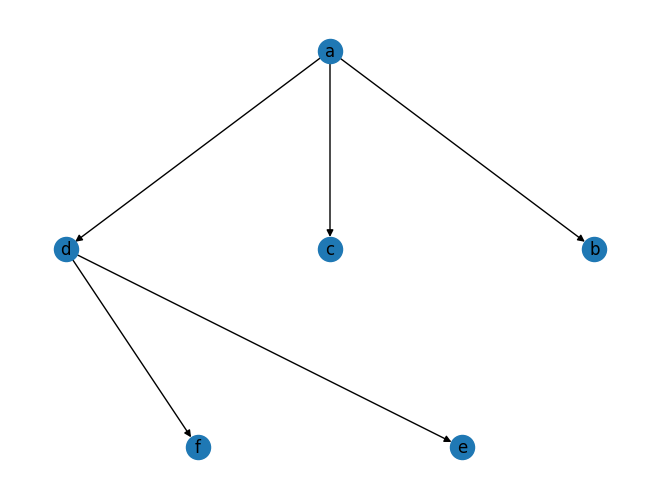

In [9]:
def draw_tree(tree):

  # For visualization purposes, layout the nodes in topological order
  for i, layer in enumerate(nx.topological_generations(tree)):
    for node in layer:
      tree.nodes[node]["layer"] = i
  pos = nx.multipartite_layout(tree, subset_key="layer", align="horizontal")

  # Flip the layout so the root node is on top
  for k in pos:
    pos[k][-1] *= -1

  # draw
  nx.draw(tree, pos=pos, with_labels=True)

edges = [
  ('a', 'b'),
  ('a', 'c'),
  ('a', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]
G = nx.DiGraph()

for u, v in edges:
  G.add_edge(u, v, action=1)

draw_tree(G)

## edge lables

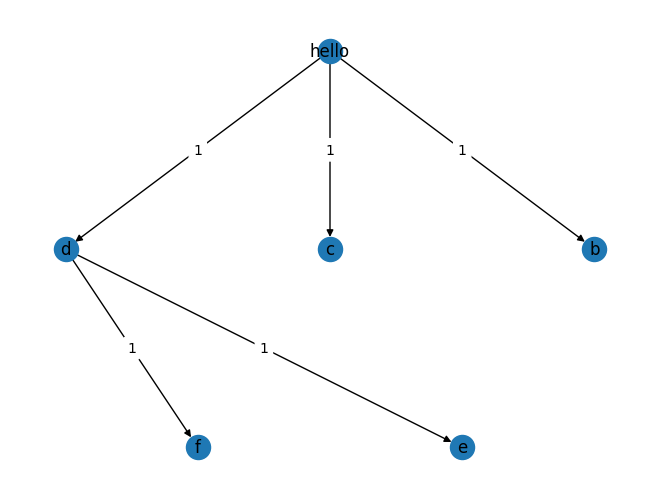

In [54]:
def get_tree_node_positions(tree):

  # For visualization purposes, layout the nodes in topological order
  for i, layer in enumerate(nx.topological_generations(tree)):
    for node in layer:
      tree.nodes[node]["layer"] = i
  pos = nx.multipartite_layout(tree, subset_key="layer", align="horizontal")

  # Flip the layout so the root node is on top
  for k in pos:
    pos[k][-1] *= -1

  return pos

def draw_tree_with_edge_labels(tree, edge_label_tag):

  pos = get_tree_node_positions(tree)

  # draw tree
  nx.draw(tree, pos=pos, with_labels=True)

  # draw edge labels
  edge_labels = {(u, v): l for u, v, l in G.edges(data=edge_label_tag)}
  el_text = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  # fix edge label orientation
  for _, t in el_text.items():
    t.set_rotation('horizontal')


edges = [
  ('hello', 'b'),
  ('hello', 'c'),
  ('hello', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]
G = nx.DiGraph()

for u, v in edges:
  G.add_edge(u, v, action=1)

draw_tree_with_edge_labels(G, 'action')

## secondary edges

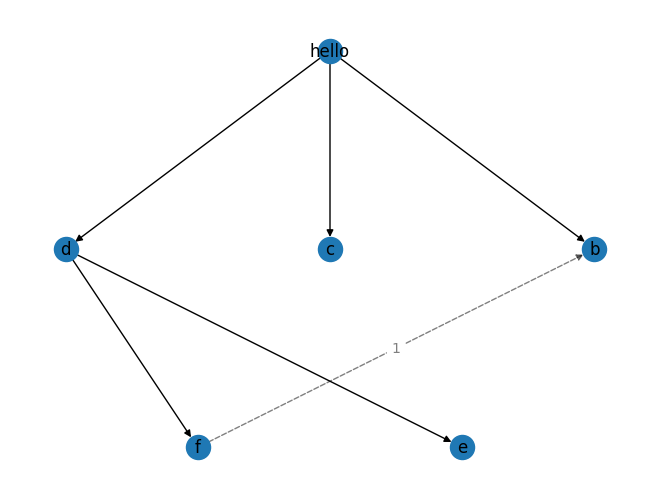

In [59]:
edges = [
  ('hello', 'b'),
  ('hello', 'c'),
  ('hello', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]
G = nx.DiGraph(edges)

pos = get_tree_node_positions(G)
nx.draw(G, pos, with_labels=True)

G.add_edge('f', 'b', action=1)
nx.draw_networkx_edges(G, pos, edgelist=[('f', 'b')], style='dashed', alpha = 0.5)

edge_labels = {(u, v): l for u, v, l in G.edges(data='action') if l is not None}
el_text = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, alpha = 0.5)

# fix edge label orientation
for _, t in el_text.items():
  t.set_rotation('horizontal')


## fix node shape

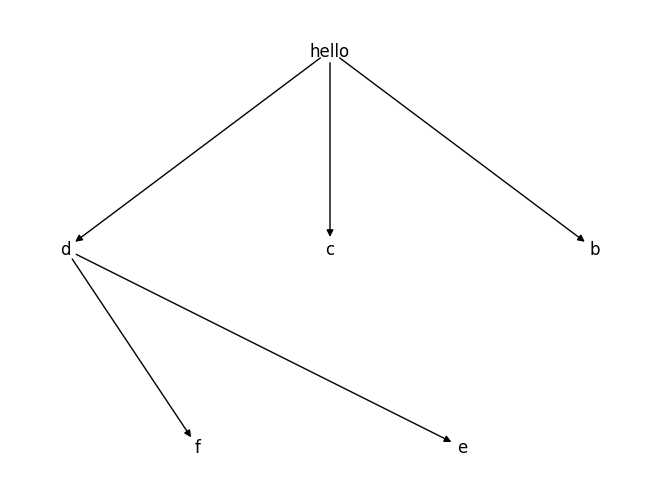

In [71]:
edges = [
  ('hello', 'b'),
  ('hello', 'c'),
  ('hello', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]
G = nx.DiGraph(edges)
pos = get_tree_node_positions(G)
nx.draw(G, pos, with_labels=True, node_shape='none')

## final

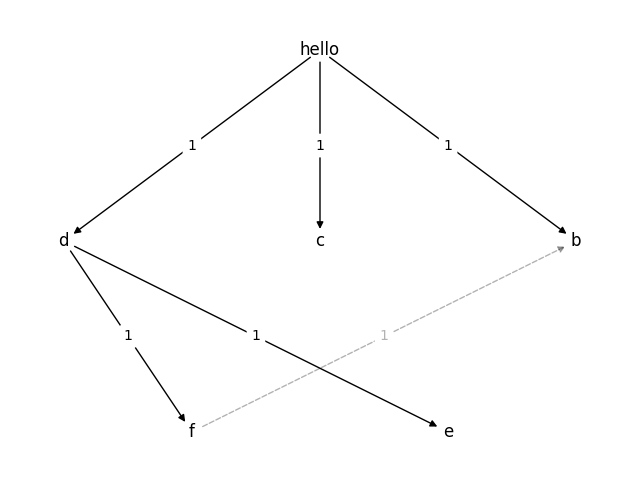

In [83]:
import matplotlib.pyplot as plt

def draw_tree_with_edge_labels(tree, edge_label_tag, secondary_edges, figure_size=(8,6), file_name=None, alpha=.3):

  def get_tree_node_positions(_tree):

    # For visualization purposes, layout the nodes in topological order
    for i, layer in enumerate(nx.topological_generations(_tree)):
      for node in layer:
        _tree.nodes[node]["layer"] = i
    pos = nx.multipartite_layout(_tree, subset_key="layer", align="horizontal")

    # Flip the layout so the root node is on top
    for k in pos:
      pos[k][-1] *= -1

    return pos

  def fix_label_orientation(text):
    for _, t in text.items():
      t.set_rotation('horizontal')

  def draw_edge_labels(_tree, _pos, _edge_labels, **kwargs):
    el_text = nx.draw_networkx_edge_labels(_tree, _pos, edge_labels=_edge_labels, **kwargs)
    fix_label_orientation(el_text)

  # set figure size
  plt.subplots(figsize=figure_size)

  pos = get_tree_node_positions(tree)

  # draw tree
  nx.draw(tree, pos=pos, with_labels=True, node_shape='none')

  # draw edge labels
  edge_labels = {(u, v): l for u, v, l in tree.edges(data=edge_label_tag)}
  draw_edge_labels(tree, pos, edge_labels)

  # add secondary edges
  if secondary_edges:
    for u, v, l in secondary_edges:
      G.add_edges_from([(u, v, {edge_label_tag: l})])

    # draw edges
    edge_list = [(u, v) for u, v, l in secondary_edges]
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, style='dashed', alpha=alpha)

    # draw labels
    edge_labels = {(u, v): l for u, v, l in secondary_edges}
    draw_edge_labels(tree, pos, edge_labels, alpha=alpha)

  if file_name:
    plt.savefig(file_name)

edges = [
  ('hello', 'b'),
  ('hello', 'c'),
  ('hello', 'd'),
  ('d', 'e'),
  ('d', 'f'),
]
G = nx.DiGraph()
for u, v in edges:
  G.add_edge(u, v, action=1)


draw_tree_with_edge_labels(G, 'action', [('f', 'b', 1)], file_name='tree.svg')